In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mtasubwayfile = "../New-York-Transportation/Raw Data/MTA_Subway.csv"
sub_data = pd.read_csv(mtasubwayfile)
sub_data = sub_data[84:111]
#sub_data

In [3]:
mtabusfile = "../New-York-Transportation/Raw Data/MTA_Bus 08-Apr_17.csv"
bus_data = pd.read_csv(mtabusfile)
bus_data = bus_data[:28]
#bus_data

In [4]:
mtatollfile = "../New-York-Transportation/Raw Data/MTA_Toll.csv"
toll_data = pd.read_csv(mtatollfile)
toll_data = toll_data[84:111]
#toll_data

In [5]:
mtacommfile_north = "../New-York-Transportation/Raw Data/MTA_Coummuter_Train_North.csv"
comm_north_data = pd.read_csv(mtacommfile_north)
comm_north_data = comm_north_data[84:112]
#comm_north_data

In [6]:
mtacommfile_long = "../New-York-Transportation/Raw Data/MTA_Commuter_Train_Long_Island.csv"
comm_long_data = pd.read_csv(mtacommfile_long)
comm_long_data = comm_long_data[84:112]
#comm_long_data

In [7]:
proj_data = sub_data
proj_data = proj_data.append(bus_data).append(toll_data).append(comm_north_data).append(comm_long_data)
#proj_data

In [8]:
proj_data = proj_data.reset_index(drop=True)
#proj_data

In [14]:
proj_data_all = proj_data.drop(['PARENT_SEQ', 'INDICATOR_SEQ','DESCRIPTION', 
                            'INDICATOR_UNIT', 'DESIRED_CHANGE', 'DECIMAL_PLACES',
                            'FREQUENCY', 'YTD_TARGET', 'MONTHLY_TARGET', 'CATEGORY',
                            'INDICATOR_NAME'], axis=1)
#proj_data_all

In [10]:
yearly_transit_data = proj_data_all.groupby(proj_data_all['PERIOD_YEAR']).sum().drop(['PERIOD_MONTH'], axis=1)
yearly_transit_data = yearly_transit_data.reset_index(drop=False)
yearly_transit_data

,PERIOD_YEAR,YTD_ACTUAL,MONTHLY_ACTUAL
0,2015.0,1.508270e+10,2.358899e+09
1,2016.0,1.524631e+10,2.365547e+09
2,2017.0,1.151823e+09,5.731450e+08


In [11]:
data_16 = proj_data_all[proj_data_all['PERIOD_YEAR']==2016]
data_16.head(5)

,AGENCY_NAME,PERIOD_YEAR,PERIOD_MONTH,YTD_ACTUAL,MONTHLY_ACTUAL
12,NYC Transit,2016.0,1.0,136398047.0,136398047.0
13,NYC Transit,2016.0,2.0,273062297.0,136664250.0
14,NYC Transit,2016.0,3.0,429363496.0,156301199.0
15,NYC Transit,2016.0,4.0,576613110.0,147249614.0
16,NYC Transit,2016.0,5.0,728533129.0,151920019.0


In [12]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
people = data_16['MONTHLY_ACTUAL']
people_sub = people[data_16['AGENCY_NAME']=='NYC Transit']
people_bus = people[data_16['AGENCY_NAME']=='MTA Bus']
people_long = people[data_16['AGENCY_NAME']=='Long Island Rail Road']
people_north = people[data_16['AGENCY_NAME']=='Metro-North Railroad']
people_toll = people[data_16['AGENCY_NAME']=='Bridges and Tunnels']

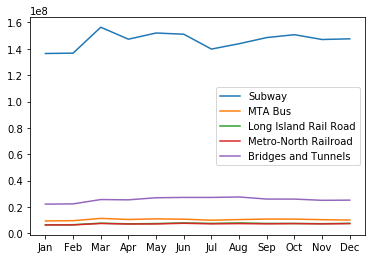

In [13]:
#fig1, ax1 = plt.subplots()
plt.plot(month, people_sub); plt.plot(month, people_bus); plt.plot(month, people_long)
plt.plot(month, people_north)
plt.plot(month, people_toll)
plt.legend(['Subway', 'MTA Bus', 'Long Island Rail Road', 'Metro-North Railroad', 'Bridges and Tunnels'])
